Running example.py ...


  0%|          | 0/5 [00:00<?, ?it/s]

Depth=0, working on node X1
X1 _||_ X2 | [] with p-value 0.445036

X1 _|/|_ X3 | [] with p-value 0.000000

X1 _|/|_ X4 | [] with p-value 0.000000

X1 _|/|_ X5 | [] with p-value 0.000000

Depth=0, working on node X2
X2 _||_ X1 | [] with p-value 0.445036

X2 _|/|_ X3 | [] with p-value 0.000000

X2 _|/|_ X4 | [] with p-value 0.000000

X2 _|/|_ X5 | [] with p-value 0.000000

Depth=0, working on node X3
X3 _|/|_ X1 | [] with p-value 0.000000

X3 _|/|_ X2 | [] with p-value 0.000000

X3 _|/|_ X4 | [] with p-value 0.000000

X3 _|/|_ X5 | [] with p-value 0.000000

Depth=0, working on node X4
X4 _|/|_ X1 | [] with p-value 0.000000

X4 _|/|_ X2 | [] with p-value 0.000000

X4 _|/|_ X3 | [] with p-value 0.000000

X4 _|/|_ X5 | [] with p-value 0.000000

Depth=0, working on node X5
X5 _|/|_ X1 | [] with p-value 0.000000

X5 _|/|_ X2 | [] with p-value 0.000000

X5 _|/|_ X3 | [] with p-value 0.000000

X5 _|/|_ X4 | [] with p-value 0.000000

Removing X1 -- X2. Sepset: [(), ()] p-value [{(): 0.4450359741

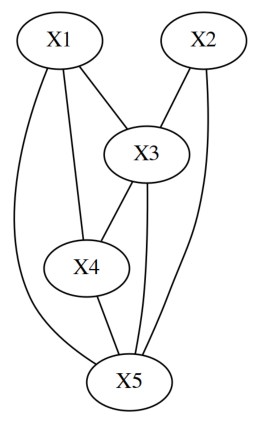

Starting Orientation by Shapley PC (Russo, 2023)
(0, 2, 1)
Neighbours of 0: [2 3 4], PWS: [(), (2,), (3,), (4,), (2, 3), (2, 4), (3, 4), (2, 3, 4)]
Neighbours of 1: [2 4], PWS: [(), (2,), (4,), (2, 4)]
Conditional sets with 2: [(2, 4), (2,), (2, 3), (2, 3, 4)]
Neighbours of 0: [2 3 4], PWS: [(), (2,), (3,), (4,), (2, 3), (2, 4), (3, 4), (2, 3, 4)]
Neighbours of 1: [2 4], PWS: [(), (2,), (4,), (2, 4)]
cond_with_y: {(2, 4): 0.9962211699922108, (2,): 0.0, (2, 3): 0.0, (2, 3, 4): 0.2717541692481933}
Neighbours of 0: [2 3 4], PWS: [(), (2,), (3,), (4,), (2, 3), (2, 4), (3, 4), (2, 3, 4)]
Neighbours of 1: [2 4], PWS: [(), (2,), (4,), (2, 4)]
cond_without_y:{(3, 4): 1.8463008899516353e-12, (4,): 0.0, (): 0.4450359741041592, (3,): 0.0}
(1, 2, 3)
Neighbours of 1: [2 4], PWS: [(), (2,), (4,), (2, 4)]
Neighbours of 3: [0 2 4], PWS: [(), (0,), (2,), (4,), (0, 2), (0, 4), (2, 4), (0, 2, 4)]
Conditional sets with 2: [(2, 4), (2,), (0, 2, 4), (0, 2)]
Neighbours of 1: [2 4], PWS: [(), (2,), (4,), (2, 

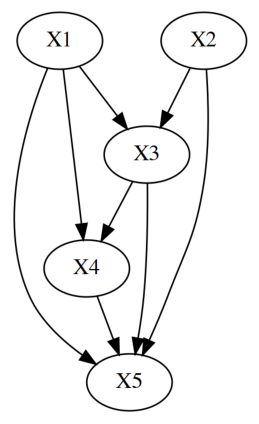

In [1]:
print("Running example.py ...")  
import os, time
import sys
sys.path.append("")
import unittest
# import hashlib
import numpy as np
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz, d_separation
from causallearn.graph.SHD import SHD
from causallearn.utils.DAG2CPDAG import dag2cpdag
from causallearn.utils.TXT2GeneralGraph import txt2generalgraph
from tests.utils_simulate_data import simulate_discrete_data, simulate_linear_continuous_data
from causallearn.utils.PCUtils.Helper import test_obj

sys.path.append("../")
# from abap_parser import *
# from aspartix_interface import *
from ABAplus.aba_plus_ import Rule, Sentence, Preference, ABA_Plus, LESS_THAN, LESS_EQUAL, NO_RELATION, CANNOT_BE_DERIVED, NORMAL_ATK, REVERSE_ATK
from ABAplus.aba_plus_ import *
from tqdm.auto import tqdm
import itertools

# print('Now start test_pc_simulate_linear_nongaussian_with_kci ...')
# print('!! It will take around 17 mins to run this test (on M1 Max chip) ... !!')
# print('!! You may also reduce the sample size (<2500), but the result will then not be totally correct ... !!')

# Graph specification.
# num_of_nodes = 5
# truth_DAG_directed_edges = {(0, 1), (0, 3), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)}
# truth_CPDAG_directed_edges = {(0, 3), (1, 3), (2, 3), (2, 4), (3, 4)}
# truth_CPDAG_undirected_edges = {(0, 1), (1, 2), (2, 1), (1, 0)}
# After the skeleton is discovered, the edges are oriented in the following way:
# Unshilded triples:
#   2 -- 1 -- 0: not v-structure.
#   1 -- 2 -- 4: not v-structure.
#   0 -- 3 -- 2: v-structure, oritented as 0 -> 3 <- 2.
#   0 -- 3 -- 4: not v-structure.
#   1 -- 3 -- 4: not v-structure.
# Then by Meek rule 1: 3 -> 4.
# Then by Meek rule 2: 2 -> 4.
# Then by Meek rule 3: 1 -> 3.

## Graph specification: Example from Colombo
truth_DAG_directed_edges = {(0, 2), (0, 3), (0, 4), (2, 4), (2, 3), (3, 4), (1, 2), (1, 4)}
## Graph specification: Double Collider
# truth_DAG_directed_edges = {(0, 2), (1, 2), (3, 2)}
## Graph specification: Collider
# truth_DAG_directed_edges = {(0, 2), (1, 2)}
num_of_nodes = max(sum(truth_DAG_directed_edges, ())) + 1
alpha = 0.1

# data = simulate_discrete_data(num_of_nodes, 10000, truth_DAG_directed_edges, 42)
## there is no randomness in data generation (with seed fixed for simulate_data).
## however, there still exists randomness in KCI (null_sample_spectral).
## for this simple test, we can assume that KCI always returns the correct result (despite randomness).
###### Simulation configuration: code to generate "./TestData/test_pc_simulated_linear_gaussian_data.txt" ######
data = simulate_linear_continuous_data(num_of_nodes, 10000, truth_DAG_directed_edges, "gaussian", 42)

# Run PC with default parameters: stable=True, uc_rule=0 (uc_sepset), uc_priority=2 (prioritize existing colliders)
# cg = pc(data=data, alpha=0.05, stable=True, uc_rule=0, uc_priority=-1, show_progress=True, indep_test='gsq')
# Run PC with: stable=True, uc_rule=0 (uc_sepset), uc_priority=0 (overwrite)
## uc_rule=3 corresponds to shapley choice of sepset.
cg = pc(data=data, alpha=alpha, ikb=False, uc_rule=3, uc_priority=4, keep_edges=False)
cg.draw_pydot_graph()

Use random graph

In [ ]:

"""Experiments for linear Gaussian SEM with two variables."""
import os, sys
sys.path.append("../")
from notears import utils
from notears.nonlinear import notears_nonlinear, NotearsMLP
# from notears.notears import notears, utils
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from causallearn.search.ConstraintBased.PC import pc
from cdt.data import AcyclicGraphGenerator
import networkx as nx
from tests.utils_simulate_data import simulate_discrete_data, simulate_linear_continuous_data
from ananke.graphs import ADMG

vertices = ['X1', 'X2', 'X3', 'X4', 'X5']
di_edges = [('X1', 'X3'), ('X1', 'X4'), ('X1', 'X5'), ('X3', 'X5'), ('X3', 'X4'), ('X4', 'X5'), ('X2', 'X3'), ('X2', 'X5')]


utils.set_random_seed(42)

num_graph = 5
num_data_per_graph = 1

n, d, s0, graph_type, sem_type = 10000, 5, 5, 'ER', 'gauss'

# equal variance
w_ranges = ((-2.0, -0.5), (0.5, 2.0))
noise_scale = [1., 1., 1., 1., 1.]
expt_name = 'equal_var'
# run_expt(num_graph, num_data_per_graph, n, d, s0, graph_type, sem_type, w_ranges, noise_scale, expt_name)

# # large a
# w_ranges = ((-2.0, -1.1), (1.1, 2.0))
# noise_scale = [1., 0.15]
# expt_name = 'large_a'
# run_expt(num_graph, num_data_per_graph, n, d, s0, graph_type, sem_type, w_ranges, noise_scale, expt_name)

# # small a
# w_ranges = ((-0.9, -0.5), (0.5, 0.9))
# noise_scale = [1, 0.15]
# expt_name = 'small_a'
# run_expt(num_graph, num_data_per_graph, n, d, s0, graph_type, sem_type, w_ranges, noise_scale, expt_name)


# def run_expt(num_graph, num_data_per_graph, n, d, s0, graph_type, sem_type, w_ranges, noise_scale, expt_name):
# os.mkdir(expt_name)
# os.chmod(expt_name, 0o777)
perf = defaultdict(list)
perf2 = defaultdict(list)
perf3 = defaultdict(list)
for ii in tqdm(range(num_graph)):
    # generator = AcyclicGraphGenerator('linear', npoints=n, nodes=d)
    # data, graph = generator.generate(rescale=True)
    B_true = utils.simulate_dag(d, s0, graph_type)
    # B_true = generator.adjacency_matrix
    # B_true = np.array( [[ 0,  0,  0,  0,  0],
    #                     [ 0,  0,  0,  0,  0],
    #                     [ 1,  1,  0,  0,  0],
    #                     [ 1,  0,  1,  0,  0],
    #                     [ 1,  1,  1,  1,  0]])
    # W_true = utils.simulate_parameter(_true, w_ranges=w_ranges)
    # W_true_fn = os.path.join(expt_name, f'graph{ii:05}_W_true.csv')
    # np.savetxt(W_true_fn, W_true, delimiter=',')
    for jj in range(num_data_per_graph):
        # X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=noise_scale)
        # X = data.to_numpy()
        # ALTERNATIVE: utils.simulate_nonlinear_sem(B_true, n, sem_type)
        
        ## Simulate data
        ## Graph specification: Example from Colombo
        # truth_DAG_directed_edges = {(0, 2), (0, 3), (0, 4), (2, 4), (2, 3), (3, 4), (1, 2), (1, 4)}
        # ## Graph specification: Double Collider
        # # truth_DAG_directed_edges = {(0, 2), (1, 2), (3, 2)}
        # ## Graph specification: Collider
        # # truth_DAG_directed_edges = {(0, 2), (1, 2)}
        truth_DAG_directed_edges = set()
        for i in range(B_true.shape[0]):
            for j in range(B_true.shape[1]):
                if B_true[i,j] == 1:
                    truth_DAG_directed_edges.add((j,i))
        G = ADMG([str(n) for n in list(range(d))], [(str(b),str(e)) for b,e in truth_DAG_directed_edges])
        G.draw(direction="TD")
        # num_of_nodes = max(sum(truth_DAG_directed_edges, ())) + 1
        # data = simulate_discrete_data(num_of_nodes, 10000, truth_DAG_directed_edges, 42)
        # data = simulate_discrete_data(d, n, truth_DAG_directed_edges,  42)
        data = simulate_linear_continuous_data(d, n, truth_DAG_directed_edges, "gaussian", 42)
        X = data.astype(np.double)
        # X_fn = os.path.join(expt_name, f'graph{ii:05}_data{jj:05}_X.csv')
        # np.savetxt(X_fn, X, delimiter=',')
        # notears

        model = NotearsMLP(dims=[d, 10, 1], bias=True)
        W_notears = notears_nonlinear(model, X, lambda1=0.01, lambda2=0.01)
        assert utils.is_dag(W_notears)
        # W_notears_fn = os.path.join(expt_name, f'graph{ii:05}_data{jj:05}_W_notears.csv')
        # np.savetxt(W_notears_fn, W_notears, delimiter=',')
        # eval
        B_notears = (W_notears != 0)
        acc = utils.count_accuracy(B_true, B_notears)
        for metric in acc:
            perf[metric].append(acc[metric])

        # model2 = pc(data=X, alpha=0.1, ikb=False, uc_rule=0, uc_priority=4, keep_edges=False)
        # model2.draw_pydot_graph()
        # W_pc = model2.G.graph
        # print(W_pc)
        # # assert utils.is_dag(W_pc)
        # # W_notears_fn = os.path.join(expt_name, f'graph{ii:05}_data{jj:05}_W_notears.csv')
        # # np.savetxt(W_notears_fn, W_notears, delimiter=',')
        # # eval
        # B_pc = (W_pc > 0)
        # acc = utils.count_accuracy(B_true, B_pc)
        # for metric in acc:
        #     perf2[metric].append(acc[metric])

        model3 = pc(data=X, alpha=0.1, ikb=False, uc_rule=3, uc_priority=4, keep_edges=False)
        model3.draw_pydot_graph()
        W_spc = model3.G.graph
        print(W_spc)
        # assert utils.is_dag(W_pc)
        # W_notears_fn = os.path.join(expt_name, f'graph{ii:05}_data{jj:05}_W_notears.csv')
        # np.savetxt(W_notears_fn, W_notears, delimiter=',')
        # eval
        B_spc = (W_spc > 0)
        acc = utils.count_accuracy(B_true, B_spc)
        for metric in acc:
            perf3[metric].append(acc[metric])

# print stats
print(expt_name, 'notears')
for metric in perf:
    print(metric, f'{np.mean(perf[metric]):.4f}', '+/-', f'{np.std(perf[metric]):.4f}')
print(expt_name, 'pc')
for metric in perf2:
    print(metric, f'{np.mean(perf2[metric]):.4f}', '+/-', f'{np.std(perf2[metric]):.4f}')
print(expt_name, 'spc')
for metric in perf3:
    print(metric, f'{np.mean(perf3[metric]):.4f}', '+/-', f'{np.std(perf3[metric]):.4f}')




  0%|          | 0/5 [00:00<?, ?it/s]

Eval Setup

In [6]:

# print stats
print(expt_name, 'notears')
for metric in perf:
    print(metric, f'{np.mean(perf[metric]):.4f}', '+/-', f'{np.std(perf[metric]):.4f}')
print(expt_name, 'pc')
for metric in perf2:
    print(metric, f'{np.mean(perf2[metric]):.4f}', '+/-', f'{np.std(perf2[metric]):.4f}')



equal_var notears
fdr 0.6667 +/- 0.4216
tpr 0.0800 +/- 0.1600
fpr 0.3200 +/- 0.2713
shd 4.6000 +/- 0.8000
nnz 2.0000 +/- 1.4142
equal_var pc
fdr 0.1333 +/- 0.2667
tpr 0.1200 +/- 0.1600
fpr 0.0800 +/- 0.1600
shd 4.4000 +/- 0.8000
nnz 1.0000 +/- 1.2649


In [19]:
B_true = np.array( [[ 0,  0,  0,  0,  0],
                        [ 0,  0,  0,  0,  0],
                        [ 1,  1,  0,  0,  0],
                        [ 1,  0,  1,  0,  0],
                        [ 1,  1,  1,  1,  0]])
## from adjacency matrix to edge list
truth_DAG_directed_edges = set()
for i in range(B_true.shape[0]):
    for j in range(B_true.shape[1]):
        if B_true[i,j] == 1:
            truth_DAG_directed_edges.add((j,i))
            
# print(truth_DAG_directed_edges1)
print(truth_DAG_directed_edges)

{(2, 4), (1, 2), (0, 4), (3, 4), (0, 3), (1, 4), (2, 3), (0, 2)}


Compare DGPs

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

n, d, s0, graph_type, sem_type = 1000, 5, 10, 'ER', 'gauss' ##low s0 does not work well, TODO: why?
B_true = np.array( [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 1,  1,  0,  0,  0],
                    [ 1,  0,  1,  0,  0],
                    [ 1,  1,  1,  1,  0]])
# truth_DAG_directed_edges = {(0, 2), (0, 3), (0, 4), (2, 4), (2, 3), (3, 4), (1, 2), (1, 4)}

truth_DAG_directed_edges = set()
for i in range(B_true.shape[0]):
    for j in range(B_true.shape[1]):
        if B_true[i,j] == 1:
            truth_DAG_directed_edges.add((j,i))
print([("X{}".format(a+1),"X{}".format(b+1)) for a,b in truth_DAG_directed_edges])
##NOTEARS
# B_true = utils.simulate_dag(d, s0, graph_type)
from notears import utils
w_ranges = ((-2.0, -0.5), (0.5, 2.0))
noise_scale = [1., 1., 1., 1., 1.]
W_true = utils.simulate_parameter(B_true, w_ranges=w_ranges)
if sem_type in ['gauss', 'exp', 'gumbel', 'uniform', 'logistic', 'poisson']:
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=noise_scale)
elif sem_type in ['mlp', 'mim', 'gp', 'gp-add']: 
    X = utils.simulate_nonlinear_sem(B_true, n, sem_type)
scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X).to_csv("nt_lin_gauss.csv", index=False, header=False)

w_ranges = ((-0.9, -0.5), (0.5, 0.9))
noise_scale = [1., 1., 1., 1., 1.]
W_true = utils.simulate_parameter(B_true, w_ranges=w_ranges)
if sem_type in ['gauss', 'exp', 'gumbel', 'uniform', 'logistic', 'poisson']:
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=noise_scale)
elif sem_type in ['mlp', 'mim', 'gp', 'gp-add']: 
    X = utils.simulate_nonlinear_sem(B_true, n, sem_type)
scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X).to_csv("nt_lin_gauss_smalla.csv", index=False, header=False)

##CDT
from tests.utils_simulate_data import simulate_discrete_data, simulate_linear_continuous_data
data = simulate_linear_continuous_data(d, n, truth_DAG_directed_edges, "gaussian", 42)
X = scaler.fit_transform(X)
df = pd.DataFrame(X).to_csv("cl_lin_gauss.csv", index=False, header=False)


[('X3', 'X5'), ('X2', 'X3'), ('X1', 'X5'), ('X4', 'X5'), ('X1', 'X4'), ('X2', 'X5'), ('X3', 'X4'), ('X1', 'X3')]
